In [1]:
import spacy
import pandas as pd
from gensim.models import Word2Vec
import pandas as pd
import nltk
import re
from nltk.stem import 	WordNetLemmatizer
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from collections import Counter
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

C:\Users\Jarviz_92\AppData\Roaming\Python\Python310\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
C:\Users\Jarviz_92\AppData\Roaming\Python\Python310\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
C:\Users\Jarviz_92\AppData\Roaming\Python\Python310\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
C:\Users\Jarviz_92\AppData\Roaming\Python\Python310\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


In [2]:
df = pd.read_excel("D:\Westiminster\Final project\FB_SCAM\Raw_Data1.xlsx")

df['Description'] = df['Description'].str.replace(r'<div.*', '', regex=True)                        
print(df.describe())
df.to_excel("D:\Westiminster\Final project\FB_SCAM\Raw_Data1.xlsx")

       Unnamed: 0.1  Unnamed: 0          Price  Word_Length  \
count    726.000000  726.000000     726.000000   726.000000   
mean     362.500000  363.272727    2263.685950    55.648760   
std      209.722436  210.586485   18675.030895    46.084771   
min        0.000000    0.000000       1.000000     3.000000   
25%      181.250000  181.250000     520.500000    21.000000   
50%      362.500000  362.500000     640.000000    43.000000   
75%      543.750000  545.750000     899.750000    74.000000   
max      725.000000  728.000000  420000.000000   185.000000   

       key_suspicious_per  Sentimental_analysis_score     Key_mad   Senti_mad  \
count          726.000000                  726.000000  726.000000  726.000000   
mean            11.418478                   52.407952    7.323232   33.752449   
std             10.209567                   44.538017    7.750019   31.793762   
min              0.462963                    2.853092    0.000000    0.430464   
25%              4.166667  

In [3]:
df=df.drop(columns=['Unnamed: 0'])

In [4]:
df.head()

,Unnamed: 0.1,Title,Location,Description,Price,corpus,preprocessed_corpus,bedroom_type,Word_Length,key_suspicious_per,Sentimental_analysis_score,Key_mad,Senti_mad,Length_mad
0,0,Studio 1 bath Flat,"Romford, England, RM7 8",Female Room mate is required. Fully furnished ...,550,Studio 1 bath Flat Female Room mate is require...,Studio 1 bath Flat Female Room mate required F...,Room,11,3.240741,10.781342,5.092593,28.673768,32
1,1,Private room for rent,"Surbiton, England, KT5 8JF",Key features\n* Now Available \n* One Double B...,150,Private room for rent Key features\n* Now Avai...,Private room rent Key feature Available One Do...,Room,80,21.296296,79.730129,12.962963,40.275019,37
2,2,Flat For Rent in Southampton,"Staines, England, TW19 7AA",Hi i have 1 room in sharing available for girl...,650,Flat For Rent in Southampton Hi i have 1 room...,Flat Rent Southampton Hi 1 room sharing availa...,Room,21,5.092593,20.857919,3.240741,18.597191,22
3,3,double bedroom,"Gosport, England, PO12 1",This is a 4 bedroom house and 2 receptions wit...,700,double bedroom This is a 4 bedroom house and 2...,double bedroom 4 house 2 reception bathroom ne...,Room,16,1.851852,14.713694,6.481481,24.741416,27
4,4,Lodger required for Annexe,"London, England, W5 3LS","Hi,\nI’m offering 1 medium size room in share ...",750,"Lodger required for Annexe Hi,\nI’m offering 1...",Lodger required Annexe Hi offering 1 medium si...,Room,30,4.629630,29.804201,3.703704,9.650909,13


In [5]:
#mergig title and description 

def merge_columns(row):
    return row['Title'] + ' ' + row['Description']

# Apply the function to create a new merged column
df['corpus'] = df.apply(merge_columns, axis=1)

def preprocess_description(description):
    # Remove spaces and special characters using regular expression
    processed_description = re.sub(r'[^a-zA-Z0-9\s]', '', description.replace('\n', ' ').lower())
    return processed_description

# Apply the preprocessing function to the entire DataFrame
df['preprocessed_corpus'] = df['corpus'].apply(preprocess_description)
df1 = (df[['corpus', 'preprocessed_corpus']])
df1.head(5)


,corpus,preprocessed_corpus
0,Studio 1 bath Flat Female Room mate is require...,studio 1 bath flat female room mate is require...
1,Private room for rent Key features\n* Now Avai...,private room for rent key features now availa...
2,Flat For Rent in Southampton Hi i have 1 room...,flat for rent in southampton hi i have 1 room...
3,double bedroom This is a 4 bedroom house and 2...,double bedroom this is a 4 bedroom house and 2...
4,"Lodger required for Annexe Hi,\nI’m offering 1...",lodger required for annexe hi im offering 1 me...


In [6]:
df['preprocessed_corpus'].iloc[0]

'studio 1 bath flat female room mate is required fully furnished property '

In [7]:
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
stop_words = set(stopwords.words("english"))
import string
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [12]:
from nltk.util import ngrams


def remove_duplicate_words(sentence):
    words = sentence.split()
    unique_words = list(dict.fromkeys(words))  # Keep only unique words while preserving order
    cleaned_sentence = " ".join(unique_words)
    return cleaned_sentence
def preprocess_text(sentence):
    words = word_tokenize(sentence)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    cleaned_sentence = " ".join(lemmatized_words)
    cleaned_sentence = re.sub(r'[^\w\s]', ' ', cleaned_sentence)  # Remove special characters
    cleaned_sentence = " ".join(cleaned_sentence.split())  # Remove extra spaces
    cleaned_sentence = cleaned_sentence.replace('\n', "")  # Remove newline characters
    cleaned_sentence = remove_duplicate_words(cleaned_sentence)  # Remove duplicate words
    return cleaned_sentence

df['preprocessed_corpus'] = df['corpus'].apply(preprocess_text)
df1 = (df[['corpus', 'preprocessed_corpus']])
df1.head(5)



,corpus,preprocessed_corpus
0,Studio 1 bath Flat Female Room mate is require...,Studio 1 bath Flat Female Room mate required F...
1,Private room for rent Key features\n* Now Avai...,Private room rent Key feature Available One Do...
2,Flat For Rent in Southampton Hi i have 1 room...,Flat Rent Southampton Hi 1 room sharing availa...
3,double bedroom This is a 4 bedroom house and 2...,double bedroom 4 house 2 reception bathroom ne...
4,"Lodger required for Annexe Hi,\nI’m offering 1...",Lodger required Annexe Hi offering 1 medium si...


In [11]:
def label_description(description):
    # Convert description to lowercase
    description = description.lower()
    
    # Define patterns to match different variations of bedroom descriptions
    patterns = [
        r'\b(room|shared|double|single|small|room|studio|en|ensuite|one|two|three|four|five|1|2|3|4|5)\s*(?:beds?|mate|share|double|bed|bedrooms|room|suite|bedflat|bedroom|flat|apartment|spacious|large\s*bedroom)\b'
        ,r'\bstudio\b'
        ,r'\bmale\b'
        ,r'\bfemale\b'
    ]
    
    for pattern in patterns:
        if re.search(pattern, description):
            return re.search(pattern, description).group(0)
    return "unknown"

# Apply the labeling function to the entire DataFrame
df['bedroom_type'] = df['preprocessed_corpus'].apply(label_description)

print(df['bedroom_type'],df['preprocessed_corpus'])
df.to_excel("D:\Westiminster\Final project\FB_SCAM\Raw_Data2.xlsx")

0           room mate
1          one double
2              1 room
3      double bedroom
4             unknown
            ...      
721           unknown
722           unknown
723           unknown
724           unknown
725           unknown
Name: bedroom_type, Length: 726, dtype: object 0      studio 1 bath flat female room mate is require...
1      private room for rent key features  now availa...
2      flat for rent in southampton  hi i have 1 room...
3      double bedroom this is a 4 bedroom house and 2...
4      lodger required for annexe hi im offering 1 me...
                             ...                        
721     25 wellspring cres wembley ha9 9ub not available
722                  private room for rent not available
723    private room for rent the apartment is fully f...
724                  private room for rent not available
725    yard to rent in aylesbury massive bedroom  in ...
Name: preprocessed_corpus, Length: 726, dtype: object


In [10]:
ld = pd.read_excel("D:\Westiminster\Final project\FB_SCAM\Labled_Data.xlsx")
ld.head()

,Title,Location,Description,Price,corpus,preprocessed_corpus,bedroom_type
0,Studio 1 bath Flat,"Romford, England, RM7 8",Female Room mate is required. Fully furnished ...,550,Studio 1 bath Flat Female Room mate is require...,Studio 1 bath Flat Female Room mate required F...,Room
1,Private room for rent,"Surbiton, England, KT5 8JF",Key features\n* Now Available \n* One Double B...,150,Private room for rent Key features\n* Now Avai...,Private room rent Key feature Available One Do...,Room
2,Flat For Rent in Southampton,"Staines, England, TW19 7AA",Hi i have 1 room in sharing available for girl...,650,Flat For Rent in Southampton Hi i have 1 room...,Flat Rent Southampton Hi 1 room sharing availa...,Room
3,double bedroom,"Gosport, England, PO12 1",This is a 4 bedroom house and 2 receptions wit...,700,double bedroom This is a 4 bedroom house and 2...,double bedroom 4 house 2 reception bathroom ne...,Room
4,Lodger required for Annexe,"London, England, W5 3LS","Hi,\nI’m offering 1 medium size room in share ...",750,"Lodger required for Annexe Hi,\nI’m offering 1...",Lodger required Annexe Hi offering 1 medium si...,Room


In [8]:
#text_length analysis # more the less keywords more the possibility of scam
def calculate_outliers(data_column, lower_multiplier=1.5, upper_multiplier=1.5):
    # Calculate the interquartile range (IQR)
    Q1 = data_column.quantile(0.25)
    Q3 = data_column.quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - lower_multiplier * IQR
    upper_bound = Q3 + upper_multiplier * IQR

    # Detect outliers
    outliers = data_column[(data_column < lower_bound) | (data_column > upper_bound)]

    return outliers


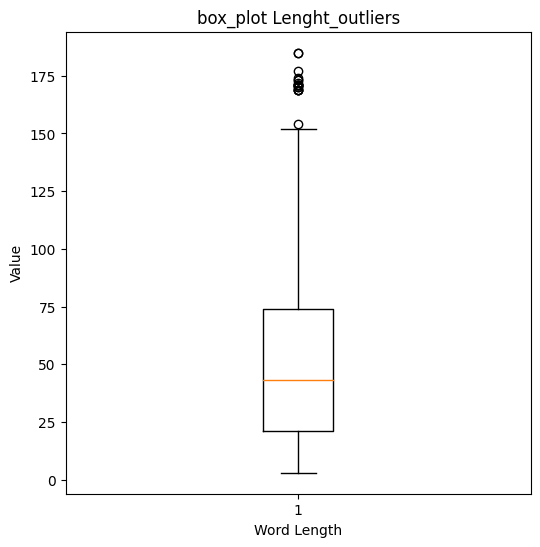

In [13]:

ld['Word_Length'] = ld['preprocessed_corpus'].apply(lambda x: len(x.split()))
outliers = calculate_outliers(ld['Word_Length'])

plt.figure(figsize=(6, 6))
plt.boxplot(ld['Word_Length'])
plt.xlabel('Word Length')
plt.ylabel('Value')
plt.title('box_plot Lenght_outliers')
plt.show()


In [14]:
from scipy import stats

std_dev = ld['Word_Length'].std()

print("Standard Deviation:", std_dev)
ld['Z_Score'] = stats.zscore(ld['Word_Length'])
ld.head(10)

Standard Deviation: 46.19047996676848


,Title,Location,Description,Price,corpus,preprocessed_corpus,bedroom_type,Word_Length,Z_Score
0,Studio 1 bath Flat,"Romford, England, RM7 8",Female Room mate is required. Fully furnished ...,550,Studio 1 bath Flat Female Room mate is require...,Studio 1 bath Flat Female Room mate required F...,Room,11,-0.967674
1,Private room for rent,"Surbiton, England, KT5 8JF",Key features\n* Now Available \n* One Double B...,150,Private room for rent Key features\n* Now Avai...,Private room rent Key feature Available One Do...,Room,80,0.527166
2,Flat For Rent in Southampton,"Staines, England, TW19 7AA",Hi i have 1 room in sharing available for girl...,650,Flat For Rent in Southampton Hi i have 1 room...,Flat Rent Southampton Hi 1 room sharing availa...,Room,21,-0.751031
3,double bedroom,"Gosport, England, PO12 1",This is a 4 bedroom house and 2 receptions wit...,700,double bedroom This is a 4 bedroom house and 2...,double bedroom 4 house 2 reception bathroom ne...,Room,16,-0.859352
4,Lodger required for Annexe,"London, England, W5 3LS","Hi,\nI’m offering 1 medium size room in share ...",750,"Lodger required for Annexe Hi,\nI’m offering 1...",Lodger required Annexe Hi offering 1 medium si...,Room,30,-0.556052
5,6 beds 6 baths House,Not available,A double room is available for rent .! \n2 per...,999,6 beds 6 baths House A double room is availabl...,6 bed bath House double room available rent 2 ...,Room,29,-0.577716
6,Mutual exchange only not for sale or renting,Not available,"large double bedrooms available in a modern, c...",488,Mutual exchange only not for sale or renting l...,Mutual exchange sale renting large double bedr...,Room,52,-0.079436
7,Double room,Not available,SHORT TERM OPTIONS ALSO AVAILABLE FOR ENSUITE ...,675,Double room SHORT TERM OPTIONS ALSO AVAILABLE ...,Double room SHORT TERM OPTIONS ALSO AVAILABLE ...,Room,185,2.801922
8,8 beds 3 bathrooms – House,Not available,2 bed end terrace house to rent\nAvailable now...,299,8 beds 3 bathrooms – House 2 bed end terrace h...,8 bed 3 bathroom House 2 end terrace house ren...,Room,31,-0.534387
9,Studio flat for rent,"Harrow, England, HA1 3UQ",Studio flat for rent \nBathroom and kitchen se...,750,Studio flat for rent Studio flat for rent \nB...,Studio flat rent Bathroom kitchen separate Bil...,Studio,8,-1.032667


c:\Users\Jarviz_92\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jarviz_92\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


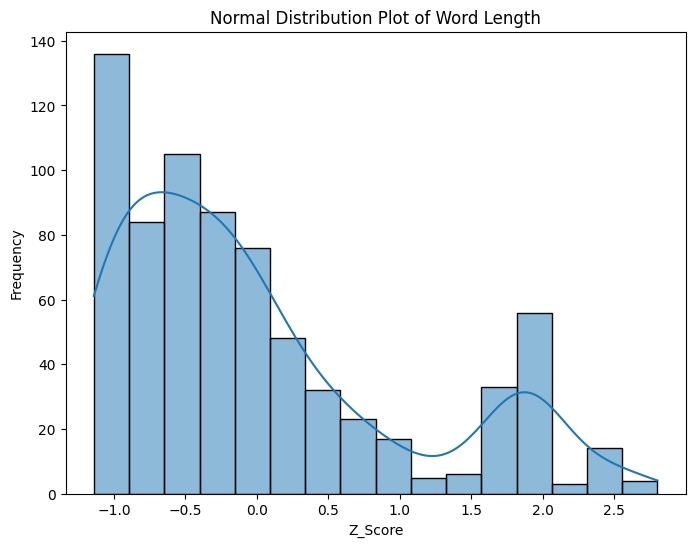

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(ld['Z_Score'], kde=True)
plt.xlabel('Z_Score')
plt.ylabel('Frequency')
plt.title('Normal Distribution Plot of Word Length')
plt.show()

In [16]:
suspicious_keywords = [
    'scam', 'fraud', 'fake', 'beware', 'alert', 'warning', 'caution',
    'deceptive', 'shady', 'suspicious', 'doubtful', 'dishonest', 'swindle',
    'unbelievable', 'free', 'urgent', 'discount', 'limited time',
    'exclusive offer', 'guaranteed', 'act now', 'don\'t miss out',
    'limited supply', 'win', 'winner', 'lottery', 'congratulations', 'won',
    'click here', 'amazing', 'opportunity', 'secret', 'miracle',
    'results may vary', 'riskfree', 'no strings attached', 'earn money',
    'make money', 'investment', 'earn', 'cash', 'income',
    'get rich', 'success', 'never before', 'extra income',
    'financial freedom', 'no credit check', 'money-back guarantee',
    'lose weight', 'magic', 'one-time investment', 'amazing deal',
    'no purchase necessary', 'selected', 'call now', 'free trial',
    'promise', 'hidden charges', 'no obligation', 'bulk email', 'buy direct',
    'cancel at any time', 'certified', 'cheap', 'clearance', 'compare rates',
    'credit', 'deal', 'discount', 'do it today', 'double your',
    'earn extra cash', 'eliminate bad credit', 'expect to earn', 'fast cash',
    'free consultation', 'free gift', 'free hosting', 'free investment',
    'free membership', 'free offer', 'guarantee', 'increase sales',
    'increase traffic', 'insurance', 'investment decision', 'lose', 'low price',
    'lower rates', 'make money fast', 'miracle', 'no cost', 'no fees',
    'notspam', 'opportunity', 'prize', 'promise', 'pure profit', 'risk-free',
    'sales', 'satisfaction guaranteed', 'save big money', 'spam', 'trial',
    'unsecured credit', 'urgent', 'weight loss', 'win','near', 'central',
    'available', 'for rent', 'lease', 'tenant', 'landlord', 'housing',
    'accommodation', 'housing market', 'city', 'urban', 'suburb',
    'furnished', 'unfurnished', 'utilities', 'amenities', 'neighborhood',
    'district', 'zone', 'residential', 'commercial', 'secure', 'modern',
    'spacious', 'cozy', 'affordable', 'luxury', 'quiet', 'safe',
    'close to', 'public transport', 'schools', 'parks', 'shops',
    'restaurants', 'bars', 'nightlife', 'pet-friendly', 'no pets',
    'professional', 'students', 'young professionals', 'families',
    'short-term', 'long-term', 'lease agreement', 'deposit', 'fees',
    'utilities included', 'viewings', 'amenities', 'renovated', 'vibrant',
    'village', 'historical', 'market', 'property management',
    'prime location', 'secure building', 'gated community', 'available now',
    'spacious living area', 'balcony', 'garden', 'terrace', 'roof deck',
    'fitness center', 'laundry', 'parking', 'public transportation',
    'easy commute', 'city living', 'affordable rent', 'quiet neighborhood',
    'shopping', 'cafes', 'museums', 'theaters', 'cultural', 'events',
    'walkable', 'biking', 'green spaces', 'waterfront', 'river views',
    'modern kitchen', 'hardwood floors', 'fireplace', 'storage', 'closets',
    'intercom', 'security system', 'fully equipped', 'high ceilings',
    'open floor plan', 'renovated bathroom', 'natural light', 'panoramic views',
    'pet policy', 'bike storage', 'onsite management', 'community room',
    'concierge', 'luxury amenities', 'walk-in closet', 'pet park'

]
def split_into_single_words(phrase_list):
    single_words = []
    for phrase in phrase_list:
        words = phrase.split()  # Split by space
        single_words.extend(words)
    return single_words

# Convert two-word phrases into single words
sus_words = split_into_single_words(suspicious_keywords)

In [17]:
suspicious_pattern = '|'.join(map(re.escape, sus_words))

# Function to calculate percentage of suspicious keywords
def calculate_suspicious_percentage(text, suspicious_keywords):
    matches = re.findall(suspicious_pattern, text.lower())
    percentage = (len(matches) / len(suspicious_keywords)) * 100
    return percentage

# Calculate suspicious keyword percentages and add to the DataFrame
ld['key_suspicious_per'] = ld['preprocessed_corpus'].apply(lambda x: calculate_suspicious_percentage(x, suspicious_keywords))

ld[['preprocessed_corpus', 'key_suspicious_per']]

,preprocessed_corpus,key_suspicious_per
0,Studio 1 bath Flat Female Room mate required F...,3.240741
1,Private room rent Key feature Available One Do...,21.296296
2,Flat Rent Southampton Hi 1 room sharing availa...,5.092593
3,double bedroom 4 house 2 reception bathroom ne...,1.851852
4,Lodger required Annexe Hi offering 1 medium si...,4.629630
...,...,...
724,25 Wellspring Cres Wembley HA9 9UB available,0.462963
725,Private room rent available,1.851852
726,Private room rent apartment fully furnished re...,5.092593
727,Private room rent available,1.851852


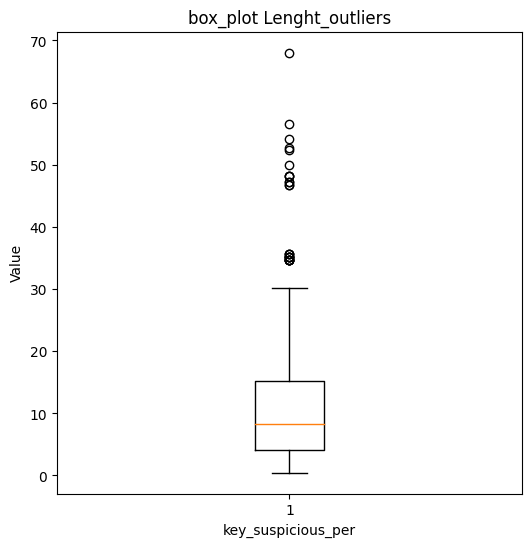

In [18]:
outliers = calculate_outliers(ld['key_suspicious_per'])
plt.figure(figsize=(6, 6))
plt.boxplot(ld['key_suspicious_per'])
plt.xlabel('key_suspicious_per')
plt.ylabel('Value')
plt.title('box_plot Lenght_outliers')
plt.show()

In [19]:
highest_percentage = ld['key_suspicious_per'].max()
print("Highest Percentage:", highest_percentage)
highest_percentage_index = ld['key_suspicious_per'].idxmax()

# Get the row using the index and print it
row_with_highest_percentage = ld.loc[highest_percentage_index]

print("Row with Highest Percentage:")
print(row_with_highest_percentage)

Highest Percentage: 68.05555555555556
Row with Highest Percentage:
Title                                           3 beds 1 bathroom – Flat
Location                                        Barking, England, IG11 0
Description            Large Double Size Bedroom\nBright &amp; Spacio...
Price                                                                650
corpus                 3 beds 1 bathroom – Flat Large Double Size Bed...
preprocessed_corpus    3 bed 1 bathroom Flat Large Double Size Bedroo...
bedroom_type                                                        3BHK
Word_Length                                                          177
Z_Score                                                         2.628607
key_suspicious_per                                             68.055556
Name: 618, dtype: object


In [22]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Jarviz_92\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [20]:
from transformers import pipeline

sentiment_analyzer = pipeline("sentiment-analysis")

def calculate_scamming_score(text):
    # Perform sentiment analysis
    result = sentiment_analyzer(text)
    sentiment_score = result[0]['score']
    
    # Calculate scamming possibility score
    scamming_score = sentiment_score * len(text.split())
    return scamming_score
for text in ld['preprocessed_corpus']:
    scamming_score = calculate_scamming_score(text)
    print("Sentimental_analysis_score", scamming_score)
ld['Scamming_Possibility_Score'] = ld['preprocessed_corpus'].apply(calculate_scamming_score)


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


Sentimental_analysis_score 10.781341671943665
Sentimental_analysis_score 79.73012924194336
Sentimental_analysis_score 20.857918560504913
Sentimental_analysis_score 14.713693618774414
Sentimental_analysis_score 29.804200530052185
Sentimental_analysis_score 23.434766471385956
Sentimental_analysis_score 31.90909457206726
Sentimental_analysis_score 177.23429024219513
Sentimental_analysis_score 28.786840617656708
Sentimental_analysis_score 7.962386608123779
Sentimental_analysis_score 79.90340232849121
Sentimental_analysis_score 41.70900422334671
Sentimental_analysis_score 98.70763421058655
Sentimental_analysis_score 93.11388045549393
Sentimental_analysis_score 47.611361503601074
Sentimental_analysis_score 26.355143308639526
Sentimental_analysis_score 29.751940369606018
Sentimental_analysis_score 64.6528509259224
Sentimental_analysis_score 70.66438865661621
Sentimental_analysis_score 56.79964470863342
Sentimental_analysis_score 4.984636604785919
Sentimental_analysis_score 16.38733607530594
S

In [21]:
ld.rename(columns={'Scamming_Possibility_Score': 'Sentimental_analysis_score'}, inplace=True)
ld1 = ld 
ld1.head()

,Title,Location,Description,Price,corpus,preprocessed_corpus,bedroom_type,Word_Length,Z_Score,key_suspicious_per,Sentimental_analysis_score
0,Studio 1 bath Flat,"Romford, England, RM7 8",Female Room mate is required. Fully furnished ...,550,Studio 1 bath Flat Female Room mate is require...,Studio 1 bath Flat Female Room mate required F...,Room,11,-0.967674,3.240741,10.781342
1,Private room for rent,"Surbiton, England, KT5 8JF",Key features\n* Now Available \n* One Double B...,150,Private room for rent Key features\n* Now Avai...,Private room rent Key feature Available One Do...,Room,80,0.527166,21.296296,79.730129
2,Flat For Rent in Southampton,"Staines, England, TW19 7AA",Hi i have 1 room in sharing available for girl...,650,Flat For Rent in Southampton Hi i have 1 room...,Flat Rent Southampton Hi 1 room sharing availa...,Room,21,-0.751031,5.092593,20.857919
3,double bedroom,"Gosport, England, PO12 1",This is a 4 bedroom house and 2 receptions wit...,700,double bedroom This is a 4 bedroom house and 2...,double bedroom 4 house 2 reception bathroom ne...,Room,16,-0.859352,1.851852,14.713694
4,Lodger required for Annexe,"London, England, W5 3LS","Hi,\nI’m offering 1 medium size room in share ...",750,"Lodger required for Annexe Hi,\nI’m offering 1...",Lodger required Annexe Hi offering 1 medium si...,Room,30,-0.556052,4.629630,29.804201


In [24]:
ld['Price'] = pd.to_numeric(ld['Price'], errors='coerce')  # Convert non-numeric values to NaN
ld = ld.dropna(subset=['Price'])  # Drop rows with NaN in 'Price' column

ld['Price'] = ld['Price'].astype(int)  # Convert remaining valid values to integers
print(ld)
ld.dtypes

                                   Title                    Location  \
0                     Studio 1 bath Flat     Romford, England, RM7 8   
1                  Private room for rent  Surbiton, England, KT5 8JF   
2          Flat For Rent in Southampton   Staines, England, TW19 7AA   
3                         double bedroom    Gosport, England, PO12 1   
4             Lodger required for Annexe     London, England, W5 3LS   
..                                   ...                         ...   
724  25 Wellspring Cres, Wembley HA9 9UB               Not available   
725                Private room for rent               Not available   
726                Private room for rent               Not available   
727                Private room for rent               Not available   
728            YARD TO RENT IN AYLESBURY               Not available   

                                           Description  Price  \
0    Female Room mate is required. Fully furnished ...    550   
1    

C:\Users\Jarviz_92\AppData\Local\Temp\ipykernel_10816\1643915988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ld['Price'] = pd.to_numeric(ld['Price'], errors='coerce')  # Convert non-numeric values to NaN


Title                          object
Location                       object
Description                    object
Price                           int32
corpus                         object
preprocessed_corpus            object
bedroom_type                   object
Word_Length                     int64
Z_Score                       float64
key_suspicious_per            float64
Sentimental_analysis_score    float64
dtype: object

In [ ]:
df3 = df3.drop(columns=['Unnamed: 0'])
df3.head()


,Title,Location,Description,Price,corpus,preprocessed_corpus,bedroom_type,Word_Length,key_suspicious_per,Sentimental_analysis_score,Key_mad,Senti_mad
0,Studio 1 bath Flat,"Romford, England, RM7 8",Female Room mate is required. Fully furnished ...,550,Studio 1 bath Flat Female Room mate is require...,Studio 1 bath Flat Female Room mate required F...,Room,11,3.240741,10.781342,5.092593,28.673768
1,Private room for rent,"Surbiton, England, KT5 8JF",Key features\n* Now Available \n* One Double B...,150,Private room for rent Key features\n* Now Avai...,Private room rent Key feature Available One Do...,Room,80,21.296296,79.730129,12.962963,40.275019
2,Flat For Rent in Southampton,"Staines, England, TW19 7AA",Hi i have 1 room in sharing available for girl...,650,Flat For Rent in Southampton Hi i have 1 room...,Flat Rent Southampton Hi 1 room sharing availa...,Room,21,5.092593,20.857919,3.240741,18.597191
3,double bedroom,"Gosport, England, PO12 1",This is a 4 bedroom house and 2 receptions wit...,700,double bedroom This is a 4 bedroom house and 2...,double bedroom 4 house 2 reception bathroom ne...,Room,16,1.851852,14.713694,6.481481,24.741416
4,Lodger required for Annexe,"London, England, W5 3LS","Hi,\nI’m offering 1 medium size room in share ...",750,"Lodger required for Annexe Hi,\nI’m offering 1...",Lodger required Annexe Hi offering 1 medium si...,Room,30,4.629630,29.804201,3.703704,9.650909


In [ ]:

median = df3['Word_Length'].median()
# Calculate the absolute deviations from the median
absolute_deviations = np.abs(df3['Word_Length'] - median)

# Calculate the median of the absolute deviations (MAD)
mad_score = absolute_deviations.median()

# Add the MAD score as a new column 'Mad_length'
df3['Mad_Length'] = mad_score
df2.head()

,Title,Location,Description,Price,corpus,preprocessed_corpus,bedroom_type,Word_Length,key_suspicious_per,Sentimental_analysis_score,Key_mad,Senti_mad,Mad_Length
0,Studio 1 bath Flat,"Romford, England, RM7 8",Female Room mate is required. Fully furnished ...,550,Studio 1 bath Flat Female Room mate is require...,Studio 1 bath Flat Female Room mate required F...,Room,11,3.240741,10.781342,5.092593,28.673768,25.0
1,Private room for rent,"Surbiton, England, KT5 8JF",Key features\n* Now Available \n* One Double B...,150,Private room for rent Key features\n* Now Avai...,Private room rent Key feature Available One Do...,Room,80,21.296296,79.730129,12.962963,40.275019,25.0
2,Flat For Rent in Southampton,"Staines, England, TW19 7AA",Hi i have 1 room in sharing available for girl...,650,Flat For Rent in Southampton Hi i have 1 room...,Flat Rent Southampton Hi 1 room sharing availa...,Room,21,5.092593,20.857919,3.240741,18.597191,25.0
3,double bedroom,"Gosport, England, PO12 1",This is a 4 bedroom house and 2 receptions wit...,700,double bedroom This is a 4 bedroom house and 2...,double bedroom 4 house 2 reception bathroom ne...,Room,16,1.851852,14.713694,6.481481,24.741416,25.0
4,Lodger required for Annexe,"London, England, W5 3LS","Hi,\nI’m offering 1 medium size room in share ...",750,"Lodger required for Annexe Hi,\nI’m offering 1...",Lodger required Annexe Hi offering 1 medium si...,Room,30,4.629630,29.804201,3.703704,9.650909,25.0


In [ ]:
def calculate_mad_score(row):
    return np.abs(row - np.median(row))
df3['Length_mad'] = calculate_mad_score(df3['Word_Length'])
df3 = df3.drop(columns=['Mad_Length'])

df3.to_excel("D:\Westiminster\Final project\FB_SCAM\Raw_Data1.xlsx")

NameError: name 'df3' is not defined

In [ ]:
median_prices = {
    'Room': 635.88,
    'Studio': 1024.26,
    '1BHK': 1353.42,
    '2BHK': 1588.70,
    '3BHK': 1905.24,
    '4&5BHK': 2645.00,
    'unknown': 0
}

# Calculate the MAD for each row compared to the median prices
def calculate_mad(row):
    bedroom_type = row['bedroom_type']
    median_price = median_prices.get(bedroom_type)
    
    if median_price != 0:  # Avoid division by zero for 'unknown'
        mad_score = np.abs(row['Price'] - median_price)
        return mad_score

df3['Mad_Price'] = df3.apply(calculate_mad, axis=1)

print(df3.head())

NameError: name 'df3' is not defined

In [ ]:
df3.head()

,Title,Location,Description,Price,corpus,preprocessed_corpus,bedroom_type,Word_Length,key_suspicious_per,Sentimental_analysis_score,Key_mad,Senti_mad,Length_mad,Mad_Price
0,Studio 1 bath Flat,"Romford, England, RM7 8",Female Room mate is required. Fully furnished ...,550,Studio 1 bath Flat Female Room mate is require...,Studio 1 bath Flat Female Room mate required F...,Room,11,3.240741,10.781342,5.092593,28.673768,32.0,85.88
1,Private room for rent,"Surbiton, England, KT5 8JF",Key features\n* Now Available \n* One Double B...,150,Private room for rent Key features\n* Now Avai...,Private room rent Key feature Available One Do...,Room,80,21.296296,79.730129,12.962963,40.275019,37.0,485.88
2,Flat For Rent in Southampton,"Staines, England, TW19 7AA",Hi i have 1 room in sharing available for girl...,650,Flat For Rent in Southampton Hi i have 1 room...,Flat Rent Southampton Hi 1 room sharing availa...,Room,21,5.092593,20.857919,3.240741,18.597191,22.0,14.12
3,double bedroom,"Gosport, England, PO12 1",This is a 4 bedroom house and 2 receptions wit...,700,double bedroom This is a 4 bedroom house and 2...,double bedroom 4 house 2 reception bathroom ne...,Room,16,1.851852,14.713694,6.481481,24.741416,27.0,64.12
4,Lodger required for Annexe,"London, England, W5 3LS","Hi,\nI’m offering 1 medium size room in share ...",750,"Lodger required for Annexe Hi,\nI’m offering 1...",Lodger required Annexe Hi offering 1 medium si...,Room,30,4.629630,29.804201,3.703704,9.650909,13.0,114.12


In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
columns = ['Mad_Price', 'Key_mad', 'Senti_mad','Length_mad']

for ax, column in zip(axes.flatten(), columns):
    df3.boxplot(column=column, ax=ax)
    ax.set_title(f'Boxplot of {column}')
    ax.set_ylabel('Values')

plt.tight_layout()
plt.show()
df3.to_excel(r'D:\\Westiminster\\Final project\\FB_SCAM\\Raw_Data3.xlsx')
             

NameError: name 'plt' is not defined

In [2]:
import pandas as pd
import numpy as np

df = pd.read_excel(r'D:\\Westiminster\\Final project\\FB_SCAM\\Raw_Data3.xlsx')

def count_special_chars(text):
    return sum(1 for char in text if not char.isalnum())

# Calculate the count of special characters in each row
df['Spl_Char'] = df['Description'].apply(count_special_chars)

# Calculate the Median Absolute Deviation (MAD) for each row
median_special_char = df['Spl_Char'].median()
df['Spl_Char_mad'] = df['Spl_Char'].apply(lambda x: np.abs(x - median_special_char))

print(df)
df.head()
df.to_excel(r'D:\\Westiminster\\Final project\\FB_SCAM\\Raw_Data3.xlsx')


     Unnamed: 0                                Title  \
0             0                 2 beds 2 baths House   
1             1                 5 beds 2 baths House   
2             2       Studio 0 bathrooms – Townhouse   
3             3       2 beds 2 bathrooms – Townhouse   
4             4           Studio 0 bathrooms – House   
..          ...                                  ...   
721         721  25 Wellspring Cres, Wembley HA9 9UB   
722         722                Private room for rent   
723         723                Private room for rent   
724         724                Private room for rent   
725         725            YARD TO RENT IN AYLESBURY   

                           Location  \
0                     Not available   
1    Stoke-on-Trent, England, ST4 5   
2                     Not available   
3                     Not available   
4                     Not available   
..                              ...   
721                   Not available   
722            

In [8]:
import pandas as pd
import language_tool_python

tool = language_tool_python.LanguageTool('en-US') 

# Load the spaCy language model
nlp = spacy.load("en_core_web_sm")

input_file_path = r'D:\\Westiminster\\Final project\\FB_SCAM\\Raw_Data3.xlsx'

df = pd.read_excel(input_file_path)

# Define the function to check grammar errors
def check_grammar_errors(text):
    matches = tool.check(text)
    return len(matches)

# Apply the function to each row and store the results in a new column
df['grammar_errors_count'] = df['corpus'].apply(check_grammar_errors)

print(df)

df.to_excel(r'D:\\Westiminster\\Final project\\FB_SCAM\\Raw_Data3 - Copy.xlsx')

df.head()


     Unnamed: 0.1  Unnamed: 0                                Title  \
0               0           0                 2 beds 2 baths House   
1               1           1                 5 beds 2 baths House   
2               2           2       Studio 0 bathrooms – Townhouse   
3               3           3       2 beds 2 bathrooms – Townhouse   
4               4           4           Studio 0 bathrooms – House   
..            ...         ...                                  ...   
721           721         721  25 Wellspring Cres, Wembley HA9 9UB   
722           722         722                Private room for rent   
723           723         723                Private room for rent   
724           724         724                Private room for rent   
725           725         725            YARD TO RENT IN AYLESBURY   

                           Location  \
0                     Not available   
1    Stoke-on-Trent, England, ST4 5   
2                     Not available   
3  

,Unnamed: 0.1,Unnamed: 0,Title,Location,Description,Price,corpus,preprocessed_corpus,bedroom_type,Word_Length,key_suspicious_per,Sentimental_analysis_score,Key_mad,Senti_mad,Length_mad,Mad_Price,Spl_Char,Spl_Char_mad,grammar_errors_count
0,0,0,2 beds 2 baths House,Not available,Purpose Built First floor studio flat\n\nThis ...,200000,2 beds 2 baths House Purpose Built First floor...,2 bed bath House Purpose Built First floor stu...,2BHK,104,14.814815,102.091376,6.481481,62.636266,61,198411.30,209,138.5,7
1,1,1,5 beds 2 baths House,"Stoke-on-Trent, England, ST4 5",Rooms to let in a very nice modern property in...,127000,5 beds 2 baths House Rooms to let in a very ni...,5 bed 2 bath House Rooms let nice modern prope...,4&5BHK,23,4.629630,19.223302,3.703704,20.231807,20,124355.00,34,36.5,2
2,2,2,Studio 0 bathrooms – Townhouse,Not available,When entering this modern 1 bed apartment you ...,100000,Studio 0 bathrooms – Townhouse When entering t...,Studio 0 bathroom Townhouse entering modern 1 ...,1BHK,51,9.259259,50.807432,0.925926,11.352323,8,98646.58,107,36.5,4
3,3,3,2 beds 2 bathrooms – Townhouse,Not available,3 bed semi-detached house to rent\nAvailable N...,75000,2 beds 2 bathrooms – Townhouse 3 bed semi-deta...,2 bed bathroom Townhouse 3 semi detached house...,2BHK,30,4.629630,22.571197,3.703704,16.883913,13,73411.30,38,32.5,1
4,4,4,Studio 0 bathrooms – House,Not available,For rent is a salvage yard. \n\nVery secure \n...,65000,Studio 0 bathrooms – House For rent is a salva...,Studio 0 bathroom House rent salvage yard secu...,Studio,30,4.629630,26.027740,3.703704,13.427370,13,63975.74,67,3.5,2


In [12]:
import numpy as np

Mad_Grammar = df['grammar_errors_count'].median()
df['Mad_Grammar'] = df['grammar_errors_count'].apply(lambda x: np.abs(x - Mad_Grammar))
df.head()

,Unnamed: 0.1,Unnamed: 0,Title,Location,Description,Price,corpus,preprocessed_corpus,bedroom_type,Word_Length,key_suspicious_per,Sentimental_analysis_score,Key_mad,Senti_mad,Length_mad,Mad_Price,Spl_Char,Spl_Char_mad,grammar_errors_count,Mad_Grammar
0,0,0,2 beds 2 baths House,Not available,Purpose Built First floor studio flat\n\nThis ...,200000,2 beds 2 baths House Purpose Built First floor...,2 bed bath House Purpose Built First floor stu...,2BHK,104,14.814815,102.091376,6.481481,62.636266,61,198411.30,209,138.5,7,4.0
1,1,1,5 beds 2 baths House,"Stoke-on-Trent, England, ST4 5",Rooms to let in a very nice modern property in...,127000,5 beds 2 baths House Rooms to let in a very ni...,5 bed 2 bath House Rooms let nice modern prope...,4&5BHK,23,4.629630,19.223302,3.703704,20.231807,20,124355.00,34,36.5,2,1.0
2,2,2,Studio 0 bathrooms – Townhouse,Not available,When entering this modern 1 bed apartment you ...,100000,Studio 0 bathrooms – Townhouse When entering t...,Studio 0 bathroom Townhouse entering modern 1 ...,1BHK,51,9.259259,50.807432,0.925926,11.352323,8,98646.58,107,36.5,4,1.0
3,3,3,2 beds 2 bathrooms – Townhouse,Not available,3 bed semi-detached house to rent\nAvailable N...,75000,2 beds 2 bathrooms – Townhouse 3 bed semi-deta...,2 bed bathroom Townhouse 3 semi detached house...,2BHK,30,4.629630,22.571197,3.703704,16.883913,13,73411.30,38,32.5,1,2.0
4,4,4,Studio 0 bathrooms – House,Not available,For rent is a salvage yard. \n\nVery secure \n...,65000,Studio 0 bathrooms – House For rent is a salva...,Studio 0 bathroom House rent salvage yard secu...,Studio,30,4.629630,26.027740,3.703704,13.427370,13,63975.74,67,3.5,2,1.0


In [15]:
average_word_length = df['Word_Length'].mean()

# Calculate Spl_Char based on the average Word_Length
df['Spl_Char'] = average_word_length

# Calculate Spl_Char_Avg by averaging Spl_Char with Word_Length
df['Spl_Char_Avg'] = (df['Spl_Char'] + df['Word_Length']) / 2

In [24]:
import numpy as np

# Calculate the MAD score for Spl_Char_Avg for each row
df['Spl_Char_Avg_MAD'] = df['Spl_Char_Avg'].apply(lambda x: np.abs(x - df['Spl_Char_Avg']).median())

df.to_excel('Raw_complete.xlsx')

In [25]:
mad_columns = ["Key_mad", "Senti_mad", "Length_mad", "Mad_Price", "Spl_Char_Avg_MAD", "Mad_Grammar"]
mad_df = df[mad_columns].copy()